<a href="https://colab.research.google.com/github/DArsem2306/Programa-Python-Utec/blob/main/Proyecto/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px

data_ruta= ('/content/drive/MyDrive/6. Cursos/2. Utec/Proyecto Final/UTEC - G2/Data/Base de datos.xlsx')
dataset=pd.read_excel(data_ruta)
data_ruta = '/content/drive/MyDrive/6. Cursos/2. Utec/Proyecto Final/UTEC - G2/Data/Base de datos.xlsx'
df = pd.read_excel(data_ruta, sheet_name="Hoja2")

In [ ]:
dataset.head()

TARIFAS

In [ ]:
#Tarifa promedio por Portafolio (Banco)
tarifa_portafolio_banco = dataset.groupby('Portafolio Banco')['Tarifa por hora'].mean().sort_values()
fig2 = px.bar(
    tarifa_portafolio_banco,
    x=tarifa_portafolio_banco.values,
    y=tarifa_portafolio_banco.index,
    orientation='h',
    title='Tarifa Promedio por Portafolio (Banco)',
    labels={'x': 'Tarifa por hora', 'y': 'Portafolio Banco'},
    color=tarifa_portafolio_banco.values,
    color_continuous_scale='Viridis'
)
fig2.show()

In [ ]:
#Tarifa promedio por Mundo
tarifa_promedio_mundo = dataset.groupby('Mundo')['Tarifa por hora'].mean().sort_values(ascending=False)
fig1 = px.bar(
    tarifa_promedio_mundo,
    x=tarifa_promedio_mundo.index,
    y=tarifa_promedio_mundo.values,
    title='Tarifa Promedio por Mundo',
    labels={'x': 'Mundo', 'y': 'Tarifa por hora'},
    color=tarifa_promedio_mundo.values,
    color_continuous_scale='Blues'
)
fig1.show()

In [ ]:
#Tarifa promedio por Seniority
tarifa_promedio = dataset.groupby('Senority')['Tarifa por hora'].mean().sort_values(ascending=False)
fig3 = px.bar(
    tarifa_promedio,
    x=tarifa_promedio.index,
    y=tarifa_promedio.values,
    title='Tarifa Promedio por Seniority',
    labels={'x': 'Seniority', 'y': 'Tarifa por hora'},
    color=tarifa_promedio.values,
    color_continuous_scale='Oranges'
)
fig3.show()

In [ ]:
#Costo total por Chapter
chapter_stats = dataset.groupby('Chapter').agg(
    total_costo=('Tarifa por hora', 'sum'),
    promedio_tarifa=('Tarifa por hora', 'mean'),
    personas=('Nombre completo', 'count')
).sort_values('total_costo', ascending=False).reset_index()
fig4 = px.bar(
    chapter_stats,
    x='Chapter',
    y='total_costo',
    title='Costo Total por Chapter',
    labels={'total_costo': 'Costo Total', 'Chapter': 'Chapter'},
    color='total_costo',
    color_continuous_scale='Tealgrn'
)
fig4.update_layout(xaxis_tickangle=-45)
fig4.show()

In [ ]:
#Tarifa promedio por Portafolio de Diseño
tarifa_portafolio_diseño = dataset.groupby('Portafolio de diseño')['Tarifa por hora'].mean().sort_values()
fig5 = px.bar(
    tarifa_portafolio_diseño,
    x=tarifa_portafolio_diseño.values,
    y=tarifa_portafolio_diseño.index,
    orientation='h',
    title='Tarifa Promedio por Portafolio de Diseño',
    labels={'x': 'Tarifa por Hora (S/.)', 'y': 'Portafolio de Diseño'},
    color=tarifa_portafolio_diseño.values,
    color_continuous_scale='Greens'
)
fig5.show()

CANTIDAD

In [ ]:
# Gráfico de barras apiladas (stacked bar) por Tipo de Contrato y Seniority
empleados_tipodecontrato = dataset.groupby(['Tipo de Contrato', 'Senority']).size().reset_index(name='Cantidad')

fig1 = px.bar(
    empleados_tipodecontrato,
    x='Tipo de Contrato',
    y='Cantidad',
    color='Senority',
    title='Distribución de Empleados por Tipo de Contrato y Seniority',
    text='Cantidad'
)
fig1.update_layout(barmode='stack', xaxis_title='Tipo de Contrato', yaxis_title='Cantidad')
fig1.show()

In [ ]:
#Personas por Chapter (gráfico de barras horizontales)
chapter_counts = dataset['Chapter'].value_counts().reset_index()
chapter_counts.columns = ['Chapter', 'Cantidad']

fig2 = px.bar(
    chapter_counts,
    x='Cantidad',
    y='Chapter',
    orientation='h',
    title='Cantidad de Personas por Chapter',
    text='Cantidad',
    color='Cantidad',
    color_continuous_scale='Blues'
)
fig2.update_layout(xaxis_title='Cantidad', yaxis_title='Chapter')
fig2.show()

In [ ]:
#Conteo de personas por Senority y Tipo de Contrato (gráfico de barras agrupadas)
conteo = dataset.groupby(['Senority', 'Tipo de Contrato']).size().reset_index(name='Cantidad')

fig3 = px.bar(
    conteo,
    x='Senority',
    y='Cantidad',
    color='Tipo de Contrato',
    barmode='group',
    title='Distribución por Seniority y Tipo de Contrato'
)
fig3.update_layout(xaxis_title='Seniority', yaxis_title='Cantidad')
fig3.show()

In [ ]:
#Heatmap de combinación Especialidad vs Unidad de Negocio
import plotly.graph_objects as go

tabla = pd.crosstab(dataset['Especialidad'], dataset['Unidad de Negocio'])

fig4 = go.Figure(data=go.Heatmap(
        z=tabla.values,
        x=tabla.columns,
        y=tabla.index,
        colorscale='YlOrRd',
        hoverongaps=False,
        text=tabla.values,
        texttemplate="%{text}"
))

fig4.update_layout(
    title='Distribución entre Especialidad y Unidad de Negocio',
    xaxis_title='Unidad de Negocio',
    yaxis_title='Especialidad',
    height=600
)
fig4.show()

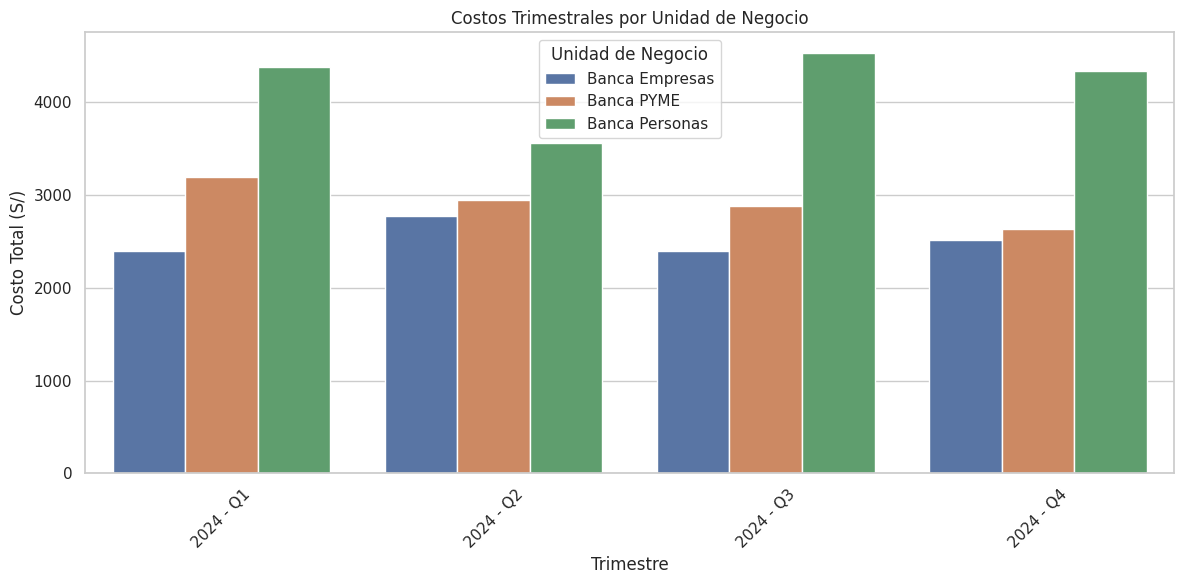

In [ ]:
# ---- LIMPIEZA Y PRIMER ANÁLISIS ----
df["Participación %"] = df["Participación en la unidad"].str.rstrip('%').astype(float)
df["Costo"] = df["Tarifa por hora"] * df["Participación %"] / 100

# Agrupar por trimestre y portafolio
costo_trimestral = df.groupby(["Año trimestre", "Portafolio Banco"])["Costo"].sum().reset_index()
costo_trimestral["Año trimestre"] = pd.Categorical(
    costo_trimestral["Año trimestre"],
    categories=sorted(costo_trimestral["Año trimestre"].unique()),
    ordered=True
)

# Gráfico de evolución trimestral
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(
    data=costo_trimestral,
    x="Año trimestre",
    y="Costo",
    hue="Portafolio Banco",
    palette='deep'
)
plt.title("Costos Trimestrales por Unidad de Negocio")
plt.xlabel("Trimestre")
plt.ylabel("Costo Total (S/)")
plt.xticks(rotation=45)
plt.legend(title="Unidad de Negocio")
plt.tight_layout()
plt.show()


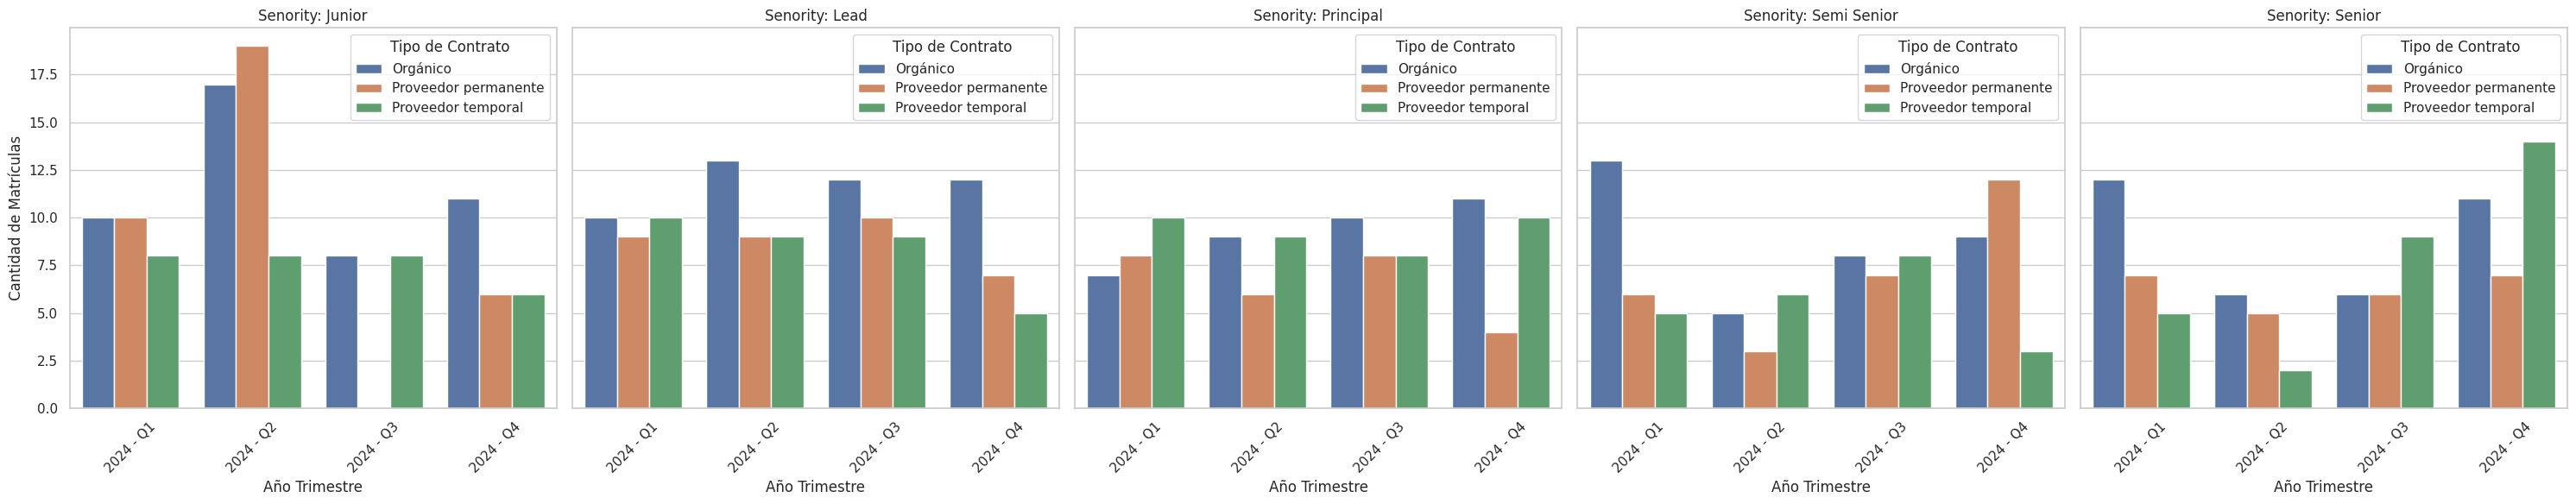

In [ ]:
# ---- DISTRIBUCIÓN POR SENIORITY Y CONTRATO ----
colab_trim = df.groupby(['Senority', 'Año trimestre'])['Tipo de Contrato'].value_counts().unstack(fill_value=0)
df_long = colab_trim.reset_index().melt(id_vars=['Senority', 'Año trimestre'],
                                        var_name='Tipo de Contrato', value_name='Cantidad')
seniority_levels = df_long['Senority'].unique()
fig, axes = plt.subplots(ncols=len(seniority_levels), figsize=(6 * len(seniority_levels), 6), sharey=True)
if len(seniority_levels) == 1:
    axes = [axes]
for ax, level in zip(axes, seniority_levels):
    sns.barplot(
        data=df_long[df_long['Senority'] == level],
        x='Año trimestre',
        y='Cantidad',
        hue='Tipo de Contrato',
        ax=ax,
        palette='deep'
    )
    ax.set_title(f'Senority: {level}')
    ax.set_ylabel('Cantidad de Matrículas')
    ax.set_xlabel('Año Trimestre')
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

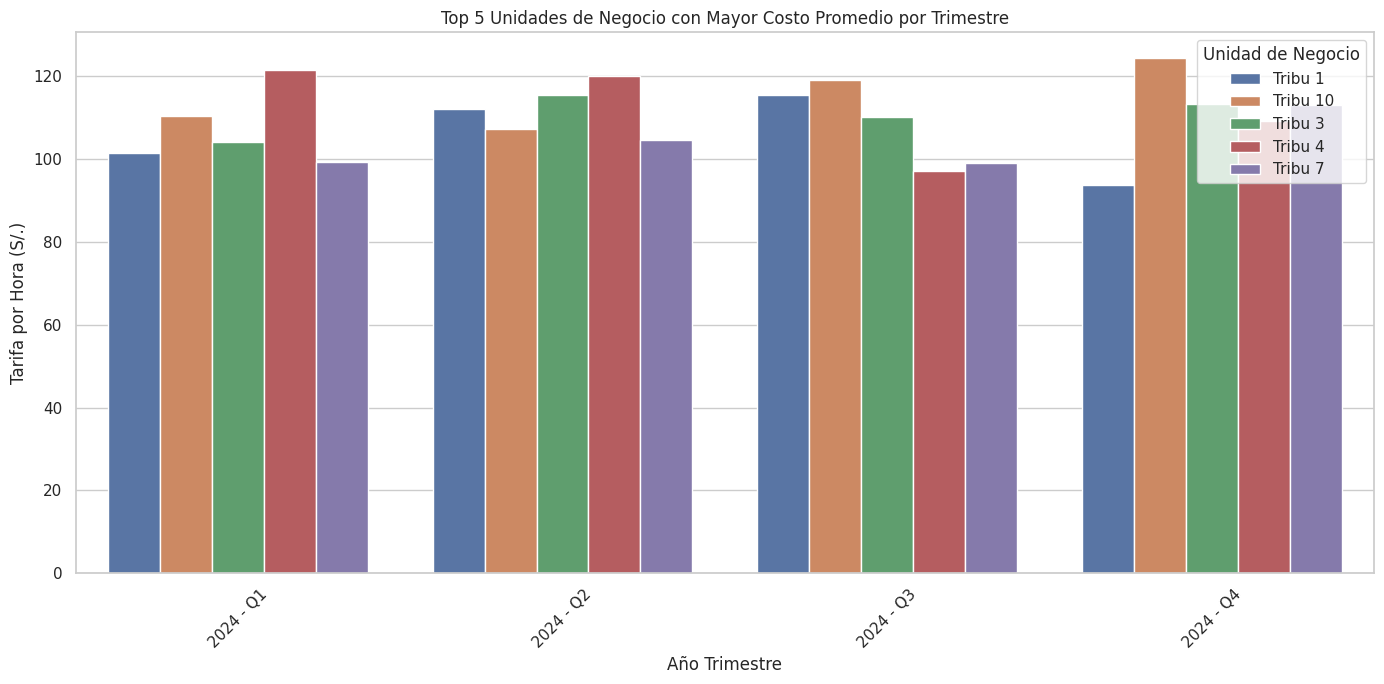

In [ ]:
# ---- TOP 5 UNIDADES DE NEGOCIO ----
top5_unidades = df.groupby('Unidad de Negocio')['Tarifa por hora'].mean().sort_values(ascending=False).head(5).index.tolist()
dataset_top5 = df[df['Unidad de Negocio'].isin(top5_unidades)]
costo_trim_top5 = dataset_top5.groupby(['Unidad de Negocio', 'Año trimestre'])['Tarifa por hora'].mean().reset_index(name='Costo Promedio')

sns.set_theme(style="whitegrid", palette="deep")
plt.figure(figsize=(14, 7))
sns.barplot(
    data=costo_trim_top5,
    x="Año trimestre",
    y="Costo Promedio",
    hue="Unidad de Negocio"
)
plt.title("Top 5 Unidades de Negocio con Mayor Costo Promedio por Trimestre")
plt.xlabel("Año Trimestre")
plt.ylabel("Tarifa por Hora (S/.)")
plt.xticks(rotation=45)
plt.legend(title="Unidad de Negocio")
plt.tight_layout()
plt.show()

In [1]:
# Requiere instalación previa
!pip install streamlit

import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

st.set_page_config(layout='wide')
st.title("Dashboard Interactivo - Análisis de Tarifas y Distribución de Empleados")

# --- Cargar datos ---
ruta = "Base de datos.xlsx"  # Asegúrate de que esté en la misma carpeta del script

@st.cache_data()
def cargar_datos():
    try:
        return pd.read_excel(ruta)
    except Exception as e:
        st.error(f"No se pudo cargar el archivo: {e}")
        return pd.DataFrame()

dataset = cargar_datos()

if not dataset.empty:
    # --- TARIFAS ---
    st.header("Análisis de Tarifas")
    col1, col2 = st.columns(2)

    # Tarifa promedio por Portafolio Banco
    tarifa_portafolio_banco = dataset.groupby('Portafolio Banco')['Tarifa por hora'].mean().sort_values()
    fig_banco = px.bar(
        tarifa_portafolio_banco,
        x=tarifa_portafolio_banco.values,
        y=tarifa_portafolio_banco.index,
        orientation='h',
        title='Tarifa Promedio por Portafolio (Banco)',
        labels={'x': 'Tarifa por hora', 'y': 'Portafolio Banco'},
        color=tarifa_portafolio_banco.values,
        color_continuous_scale='Viridis'
    )
    col1.plotly_chart(fig_banco, use_container_width=True)

    # Tarifa promedio por Mundo
    tarifa_mundo = dataset.groupby('Mundo')['Tarifa por hora'].mean().sort_values(ascending=False)
    fig_mundo = px.bar(
        tarifa_mundo,
        x=tarifa_mundo.index,
        y=tarifa_mundo.values,
        title='Tarifa Promedio por Mundo',
        labels={'x': 'Mundo', 'y': 'Tarifa por hora'},
        color=tarifa_mundo.values,
        color_continuous_scale='Blues'
    )
    col2.plotly_chart(fig_mundo, use_container_width=True)

    # Tarifa por Seniority
    tarifa_seniority = dataset.groupby('Senority')['Tarifa por hora'].mean().sort_values(ascending=False)
    fig_seniority = px.bar(
        tarifa_seniority,
        x=tarifa_seniority.index,
        y=tarifa_seniority.values,
        title='Tarifa Promedio por Seniority',
        labels={'x': 'Seniority', 'y': 'Tarifa por hora'},
        color=tarifa_seniority.values,
        color_continuous_scale='Oranges'
    )
    st.plotly_chart(fig_seniority, use_container_width=True)

    # Costo total por Chapter
    chapter_stats = dataset.groupby('Chapter').agg(
        total_costo=('Tarifa por hora', 'sum'),
        promedio_tarifa=('Tarifa por hora', 'mean'),
        personas=('Nombre completo', 'count')
    ).sort_values('total_costo', ascending=False).reset_index()

    fig_chapter = px.bar(
        chapter_stats,
        x='Chapter',
        y='total_costo',
        title='Costo Total por Chapter',
        labels={'total_costo': 'Costo Total', 'Chapter': 'Chapter'},
        color='total_costo',
        color_continuous_scale='Tealgrn'
    )
    fig_chapter.update_layout(xaxis_tickangle=-45)
    st.plotly_chart(fig_chapter, use_container_width=True)

    # Tarifa por Portafolio de Diseño
    tarifa_diseño = dataset.groupby('Portafolio de diseño')['Tarifa por hora'].mean().sort_values()
    fig_diseño = px.bar(
        tarifa_diseño,
        x=tarifa_diseño.values,
        y=tarifa_diseño.index,
        orientation='h',
        title='Tarifa Promedio por Portafolio de Diseño',
        labels={'x': 'Tarifa por Hora (S/.)', 'y': 'Portafolio de Diseño'},
        color=tarifa_diseño.values,
        color_continuous_scale='Greens'
    )
    st.plotly_chart(fig_diseño, use_container_width=True)

    # --- CANTIDAD ---
    st.header("Distribución de Empleados")

    # Tipo de Contrato y Seniority
    empleados_tipodecontrato = dataset.groupby(['Tipo de Contrato', 'Senority']).size().reset_index(name='Cantidad')
    fig_stack = px.bar(
        empleados_tipodecontrato,
        x='Tipo de Contrato',
        y='Cantidad',
        color='Senority',
        title='Empleados por Tipo de Contrato y Seniority',
        text='Cantidad'
    )
    fig_stack.update_layout(barmode='stack')
    st.plotly_chart(fig_stack, use_container_width=True)

    # Personas por Chapter
    chapter_counts = dataset['Chapter'].value_counts().reset_index()
    chapter_counts.columns = ['Chapter', 'Cantidad']
    fig_ch_count = px.bar(
        chapter_counts,
        x='Cantidad',
        y='Chapter',
        orientation='h',
        title='Cantidad de Personas por Chapter',
        color='Cantidad',
        color_continuous_scale='Blues'
    )
    st.plotly_chart(fig_ch_count, use_container_width=True)

    # Seniority vs Tipo de Contrato
    conteo = dataset.groupby(['Senority', 'Tipo de Contrato']).size().reset_index(name='Cantidad')
    fig_conteo = px.bar(
        conteo,
        x='Senority',
        y='Cantidad',
        color='Tipo de Contrato',
        barmode='group',
        title='Distribución por Seniority y Tipo de Contrato'
    )
    st.plotly_chart(fig_conteo, use_container_width=True)

    # Heatmap Especialidad vs Unidad de Negocio
    tabla = pd.crosstab(dataset['Especialidad'], dataset['Unidad de Negocio'])
    fig_heat = go.Figure(data=go.Heatmap(
        z=tabla.values,
        x=tabla.columns,
        y=tabla.index,
        colorscale='YlOrRd',
        hoverongaps=False,
        text=tabla.values,
        texttemplate="%{text}"
    ))
    fig_heat.update_layout(
        title='Especialidad vs Unidad de Negocio',
        xaxis_title='Unidad de Negocio',
        yaxis_title='Especialidad',
        height=600
    )
    st.plotly_chart(fig_heat, use_container_width=True)
else:
    st.warning("No se pudo visualizar la información. Verifica el archivo de origen.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


2025-07-05 15:40:53.746 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 15:40:53.748 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 15:40:53.887 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-05 15:40:53.888 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 15:40:53.890 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 15:40:53.891 No runtime found, using MemoryCacheStorageManager
2025-07-05 15:40:53.893 No runtime found, using MemoryCacheStorageManager
2025-07-05 15:40:53.894 Thread 'MainThread': missing ScriptRunContext! This warning ca

In [3]:
!ls

sample_data


In [2]:
!jupyter nbconvert --to script "Proyecto_Final.ipynb"


[NbConvertApp] WARNING | pattern 'Proyecto_Final.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
